# Première implémentation: LeNet-5

In [12]:
# charger la base d'entrainement et de validation
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [13]:
# Normaliser les données pour qu'elles soient entre 0 et 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Redimensionner les images

In [14]:
print("Taille initiale de la base d'entrainement: ", train_images.shape)
print("Taille initiale de la base de validation: ", test_images.shape)

import tensorflow as tf

train_images = tf.expand_dims(train_images, axis=-1)  # Add channel dimension
train_images = tf.image.resize(train_images, [32, 32])  # Resize train_images

test_images = tf.expand_dims(test_images, axis=-1)  # Add channel dimension
test_images = tf.image.resize(test_images, [32, 32])  # Resize test_images


print("Taille de la base d'entrainement: ", train_images.shape)
print("Taille de la base de validation: ", test_images.shape)

Taille initiale de la base d'entrainement:  (60000, 28, 28)
Taille initiale de la base de validation:  (10000, 28, 28)
Taille de la base d'entrainement:  (60000, 32, 32, 1)
Taille de la base de validation:  (10000, 32, 32, 1)


Définition du modèle

In [15]:
from tensorflow.keras import layers , models

In [16]:
model = models.Sequential([
    # Première couche de convolution, avec padding 'same' pour adapter la taille de l'entrée
    layers.Conv2D(input_shape=(32, 32, 1), filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    # Première couche de pooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # Deuxième couche de convolution
    layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    # Deuxième couche de pooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # Troisème couche de convolution
    layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    # Aplatir les cartes de caractéristiques pour les passer aux couches entièrement connectées
    layers.Flatten(),
    # Première couche entièrement connectée
    layers.Dense(84, activation='relu'),
    # Couche de sortie avec activation softmax pour la classification de 10 chiffres
    layers.Dense(10, activation='softmax')
])

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
# Afficher l'architecture du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

Entrainement du modèle

In [19]:
# Entrainement du modèle
history = model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.8877 - loss: 0.3693
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9812 - loss: 0.0619
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9856 - loss: 0.0429
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9892 - loss: 0.0329


In [20]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9838 - loss: 0.0492
Test Loss: 0.03644457831978798
Test Accuracy: 0.9883000254631042


## Entrainement et Evaluation du modèle
## Hyperparmêtres

In [21]:
from tensorflow.keras import layers, models

# Définition du modèle LeNet-5
model = models.Sequential([
    # Première couche de convolution, avec padding 'same' pour adapter la taille de l'entrée
    layers.Conv2D(input_shape=(32, 32, 1), filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    # Première couche de pooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # Deuxième couche de convolution
    layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    # Deuxième couche de pooling
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # Troisème couche de convolution
    layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    # Aplatir les cartes de caractéristiques pour les passer aux couches entièrement connectées
    layers.Flatten(),
    # Première couche entièrement connectée
    layers.Dense(84, activation='relu'),
    # Couche de sortie avec activation softmax pour la classification de 10 chiffres
    layers.Dense(10, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

model.compile(optimizer= Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrainement et évaluation du modèle
history = model.fit(train_images, train_labels, epochs=4, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.7498 - loss: 0.9290 - val_accuracy: 0.9472 - val_loss: 0.1770
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9503 - loss: 0.1726 - val_accuracy: 0.9653 - val_loss: 0.1151
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9638 - loss: 0.1216 - val_accuracy: 0.9749 - val_loss: 0.0802
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9723 - loss: 0.0921 - val_accuracy: 0.9764 - val_loss: 0.0754


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

(1, 32, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


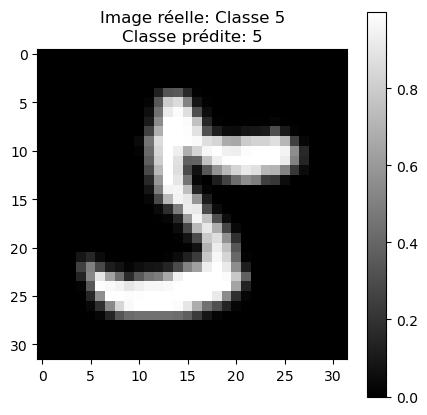

In [26]:
import numpy as np
# Choisir une image aléatoirement de la base de validation
img_index = np.random.randint(0, test_images.shape[0])
test_image = test_images[img_index]
test_label = test_labels[img_index]
test_image_preprocessed = np.expand_dims(test_image, axis=0)  # Ajouter la dimension du batch


print(test_image_preprocessed .shape)
predictions = model.predict(test_image_preprocessed )
predicted_class = np.argmax(predictions)

import matplotlib.pyplot as plt
# Afficher l'image et les informations de classification
plt.figure(figsize=(5, 5))
plt.imshow(test_image, cmap='gray')
plt.title(f"Image réelle: Classe {test_label}\nClasse prédite: {predicted_class}")
plt.colorbar()
plt.grid(False)
plt.show()

Résultats de la première couche de convolution

In [29]:
# Obtenir la sortie de la première couche de convolution
first_conv_layer = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
first_conv_output = first_conv_layer.predict(test_image_preprocessed)

# Afficher les résultats de la convolution
n_filters = first_conv_output.shape[-1]
fig, axes = plt.subplots(1, n_filters, figsize=(20, 20))
for i in range(n_filters):
    axes[i].imshow(first_conv_output[0, :, :, i], cmap='gray')
    axes[i].set_title(f'Filtre {i+1}')
    axes[i].axis('off')

plt.show()

ValueError: The layer sequential_1 has never been called and thus has no defined input.